# Calculating the frequency that topics occur in the LIAR dataset using the "subject" column

## Reading in the LIAR dataset

In [1]:
import pandas as pd

# Reading both the training and testing dataset

LIAR_train = pd.read_csv("liar_dataset/train.tsv", sep='\t', header=0)
LIAR_test = pd.read_csv("liar_dataset/test.tsv", sep='\t', header=0)

# Adding the column names to both dataset

LIAR_train.columns =["id", "label", "statement", "subject", "speaker", "job title", "state info", "party affiliation", "barely true counts", "false counts", "half true counts", "mostly true counts", "pants on fire counts", "context"]
LIAR_test.columns =["id", "label", "statement", "subject", "speaker", "job title", "state info", "party affiliation", "barely true counts", "false counts", "half true counts", "mostly true counts", "pants on fire counts", "context"]

# Concatenating the training and test dataset

LIAR_data = pd.concat([LIAR_train, LIAR_test], ignore_index=True, sort=False)

# Dropping rows that do not represent exactly 'true' or 'false' information

LIAR_data = LIAR_data.drop(LIAR_data.query('label == "half-true"').index)
LIAR_data = LIAR_data.drop(LIAR_data.query('label == "barely-true"').index)
LIAR_data = LIAR_data.drop(LIAR_data.query('label == "mostly-true"').index)

## Calculating the count of each unique value in the subject column

In [2]:
subject_counts = LIAR_data['subject'].value_counts().nlargest(20)
subject_counts

health-care             203
elections               156
taxes                   136
candidates-biography    115
immigration             109
education                99
economy                  69
guns                     68
federal-budget           58
economy,jobs             51
abortion                 50
jobs                     47
energy                   45
foreign-policy           44
state-budget             40
history                  39
crime                    37
ethics                   36
transportation           36
terrorism                35
Name: subject, dtype: int64

## Presenting the frequency of subjects on a horizontal bar chart

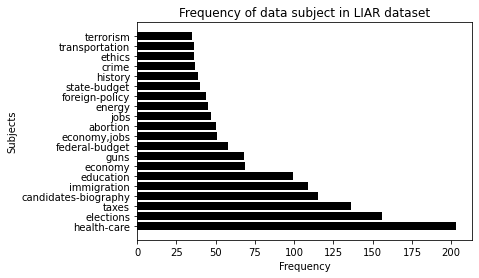

In [3]:
import numpy as np
import matplotlib.pyplot as plt
  
subjects = list(subject_counts.keys())
values = list(subject_counts.values)
  
plt.barh(subjects, values, color ='black')
plt.xlabel("Frequency")
plt.ylabel("Subjects")
plt.title("Frequency of data subject in LIAR dataset")
plt.show()